In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('housing.csv')
#Giving you column names to make it easy for you
x_columns = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
y_column = ["median_house_value"]
data = data.drop(columns=['ocean_proximity'])
data = data.dropna()
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


# Data Cleaning and Feature Creation

In [3]:
# Making Features from categorical variables
# If you can see the dataframe, it's obvious that our algorithm can't take in the column ocean_proximity, 
# since it isn't in the form of numbers, which is the input to our linear equation. 
# Let's do a simple transformation and turn this into a simple binary classification

In [4]:
#Normalizing Vectors 

#Task: Implement min/max data normalization on continous data 
# Pseudocode data_normalized = data / max of data

def normalize_data(df,columns):
    normalized_df = pd.DataFrame()
    for column in columns:
        normalized_df[column] = df[column] / df[column].max()
    return normalized_df

In [5]:
norm_data = normalize_data(data,["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"])

In [6]:
#turn normalized data into a numpy array that we can do things with these values
x = norm_data.values
y = data["median_house_value"].values

# Training our Model

In [7]:
#Setting up hyperparameters

#Alpha is our learning rate
alpha = 0.1


#Iterations is how many times we will run our algorithm
iterations = 10000

In [8]:
# Note: np.dot() is simply matrix and vector multiplication, while np.inner() is the standard definition of dot product

def train(x,y,epochs,alpha):
    #Setting up variables
    
    #Storing our cost function, Mean Squared Error
    history = []
    
    #Finding the number of weights we need and also the number of samples
    num_weights = x.shape[1]
    n = x.shape[0]
    
    #Initializing our weights to random numbers
    np.random.seed(69420)
    weights = np.random.random(num_weights)
    
    #iterating through each training step
    for i in range(iterations):
        
        #testing the model and finding the error
        predictions = np.inner(x,weights)
        error = predictions - y
        
        #finding the mean square error of the current weights and then add it to our mse list
        rmse = np.sqrt((1/(2*n)) * np.sum(error**2))
        history.append(rmse)
        
        #finding the gradient and then defining the new weights using this gradient
        gradient = (1/n) * np.dot(x.T,error)
        weights = weights - (alpha * gradient)
    
    return weights,history    

In [27]:
weights,history = train(x,y,iterations, alpha)

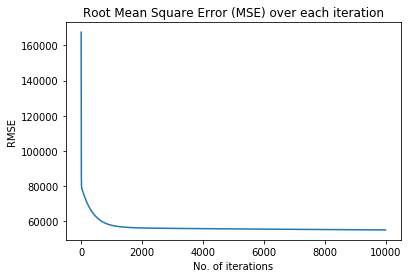

In [10]:
plt.title('Root Mean Square Error (MSE) over each iteration')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE')
plt.plot(history)
plt.show()

In [11]:
#Finding MSE
n = x.shape[0]

predictions = np.inner(x,weights)
error = predictions - y
average_error =  np.sum(abs(error)) / n
average_error

57862.81619228138

In [37]:
test_x = x[2]
test_y = y[2]
weights

array([   8302.63347341,  135254.13089015, -215097.99707338,
        104032.59608963,  -75627.86662851,  178950.36450994,
       -192593.29458102,  156433.17140947,  649173.02971835])

In [30]:
np.inner(test_x,weights)

381311.4137830504

# Adding a bias term

In [12]:
ones = np.ones((np.shape(x)[0],1))
x = np.hstack((ones,x))

In [13]:
weights,history = train(x,y,iterations, alpha)

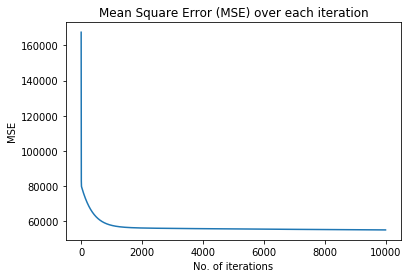

In [14]:
plt.title('Mean Square Error (MSE) over each iteration')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.plot(history)
plt.show()

In [15]:
#Finding Average Error

predictions = np.inner(x,weights)
error = predictions - y
average_error =  np.sum(abs(error)) / n
average_error

57882.6986366312

In [16]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

# Binary Classification

In [17]:
#Greater than amount, gets label 1, lesser than gets -1
def apply_binary(y,num):
    y_binary = np.zeros_like(y)
    for idx, sample in enumerate(y):
        if sample > num:
            y_binary[idx] = 1
        else:
            y_binary[idx] = -1
    return y_binary     

In [18]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [38]:
y_binary = apply_binary(y,200000)

In [39]:
weights,history = train(x,y_binary,iterations, alpha)

In [41]:
np.inner(x[1],weights)

1.1388696944975667

In [21]:
classifications = np.sign(np.inner(x,weights))

In [22]:
 np.mean(classifications == y_binary) 

0.7903391572456321

In [23]:
from sklearn import linear_model

In [24]:
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(x, y_binary)
predicted = clf.predict(x)
np.mean(predicted == y_binary)

0.7935692262516517